In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [42]:
train = pd.read_csv('train_data.csv')

In [43]:
test = pd.read_csv('test_data.csv')

In [44]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [45]:
x_train = train.drop(['label'] , axis = 1).values

In [46]:
x_train = x_train.reshape(50000,32,32,3).astype('float32')/255

In [47]:
x_train.shape

(50000, 32, 32, 3)

In [48]:
y_train = train['label'].values

In [49]:
y_train.shape

(50000,)

In [50]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [51]:
x_test = test.drop(['label'] , axis = 1).values

In [52]:
x_test = x_test.reshape(10000,32,32,3).astype('float32')/255

In [53]:
x_test.shape

(10000, 32, 32, 3)

In [54]:
y_test = test['label'].values

In [55]:
y_test.shape

(10000,)

In [65]:
model = Sequential([    
    Flatten(input_shape = (32,32,3)),
    Dense(64,activation = 'relu'),
    Dense(32,activation = 'relu'),
   Dense(28,activation = 'relu'),
    Dropout(0.2),
    Dense(10,activation = 'softmax')
])

In [66]:
model.compile(optimizer = SGD(learning_rate = 0.01) , loss = "sparse_categorical_crossentropy" , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size = 64,epochs = 11,validation_split = 0.2)

Epoch 1/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1636 - loss: 2.2273 - val_accuracy: 0.2853 - val_loss: 1.9767
Epoch 2/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2704 - loss: 1.9905 - val_accuracy: 0.3199 - val_loss: 1.8818
Epoch 3/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3018 - loss: 1.9167 - val_accuracy: 0.3442 - val_loss: 1.8324
Epoch 4/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3252 - loss: 1.8569 - val_accuracy: 0.3623 - val_loss: 1.7868
Epoch 5/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3413 - loss: 1.8216 - val_accuracy: 0.3745 - val_loss: 1.7547
Epoch 6/11
373/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3552 - loss: 1.7948

In [30]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6615 - loss: 0.9649


In [31]:
loss

0.9803241491317749

In [32]:
accuracy

0.6603999733924866

In [33]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [35]:
y_pred = np.argmax(y_pred,1)

In [36]:
y_pred

array([3, 8, 1, ..., 5, 1, 7])

In [37]:
csr = classification_report(y_test,y_pred)

In [38]:
print(csr)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1000
           1       0.73      0.80      0.76      1000
           2       0.58      0.50      0.53      1000
           3       0.46      0.54      0.50      1000
           4       0.67      0.53      0.59      1000
           5       0.61      0.51      0.56      1000
           6       0.77      0.74      0.76      1000
           7       0.69      0.76      0.72      1000
           8       0.83      0.68      0.75      1000
           9       0.63      0.84      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



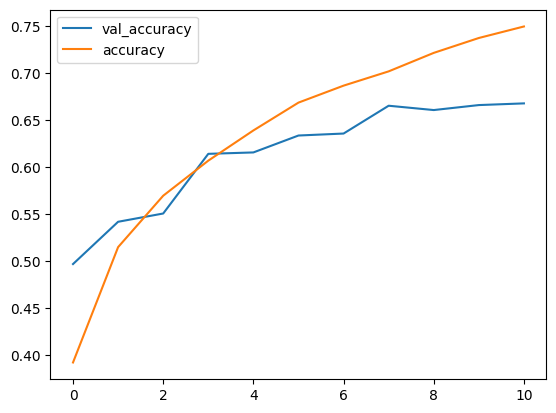

In [39]:
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.legend()

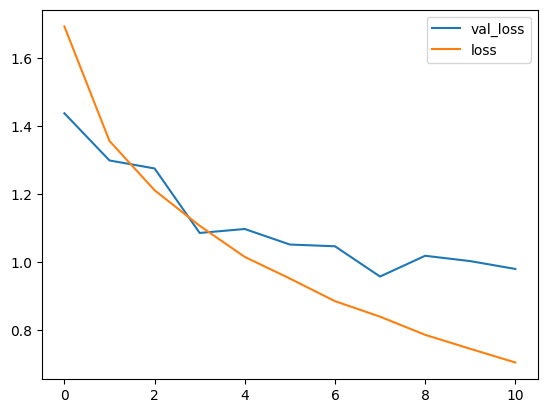

In [40]:
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.plot(history.history['loss'] , label = 'loss')
plt.legend()